# Project: Heart Disease Classification

By: odubajo abdul qoyyum


This notebook covers:
- Loading the data
- Data  assessing
- Feature Engineering and Outlier detection
- Simple EDA
- Feature scaling
- Creating two  models

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#preprocessing module
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split ,StratifiedKFold,GridSearchCV

##feature Scaling
from sklearn.preprocessing import StandardScaler

## feature selection
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

###  Load the dataset

In [2]:
# Load files into a pandas dataframe
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###  Data Assessing and cleaning

In [3]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


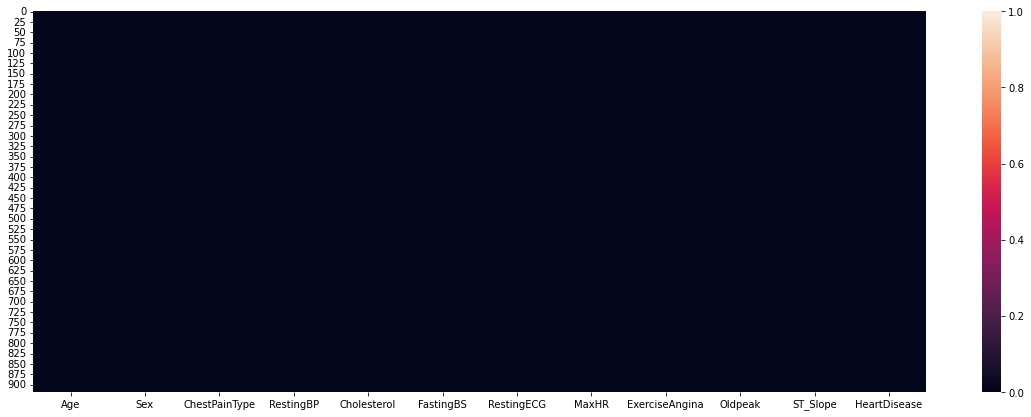

In [4]:
#check missing values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df.isnull(), vmin=0, vmax = 1)

- there seems to be no missing data

In [5]:
# cecking for values of zero

df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [6]:
#replacing zero values with the mean()

df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].mean())

##  Feature Engineering 

In [7]:
#Encoding categorical Data
df['Sex'].replace( { 'M':1, 'F':0} , inplace=True)
df['RestingECG'].replace( { 'Normal':1, 'ST':2, 'LVH':3} , inplace=True)
df['ExerciseAngina'].replace( { 'N':0, 'Y':1} , inplace=True)
df['ST_Slope'].replace( { 'Up':1, 'Flat':2, 'Down':3} , inplace=True)
df['ChestPainType'].replace( { 'ATA':1, 'NAP':2, 'ASY':3, 'TA':4} , inplace=True)

##  Outlier detection

In [8]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.452070,132.396514,198.799564,0.233115,1.603486,136.809368,0.404139,0.887364,1.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,1.000000


- there are outliers in some of the columns

## Outlier removal

In [9]:
# creating a function to remove values greater than two standard deviations from the mean

def remove_outliers(data, column):
    mean=data[column].std()
    std=data[column].mean()

    #generating the treshold
    treshold=mean+std*2

    #getting the data below the treshold

    data=data[data[column] <=treshold]

    return data


In [10]:
#removing the outiers

df = remove_outliers(df, 'Cholesterol')
df = remove_outliers(df, 'RestingBP')

## Exploratory Data Analysis

In [11]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       218
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

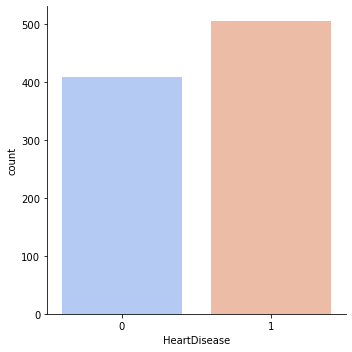

In [12]:
# Explore Target distribution 
sns.catplot(x="HeartDisease", kind="count", data=df,palette='coolwarm')

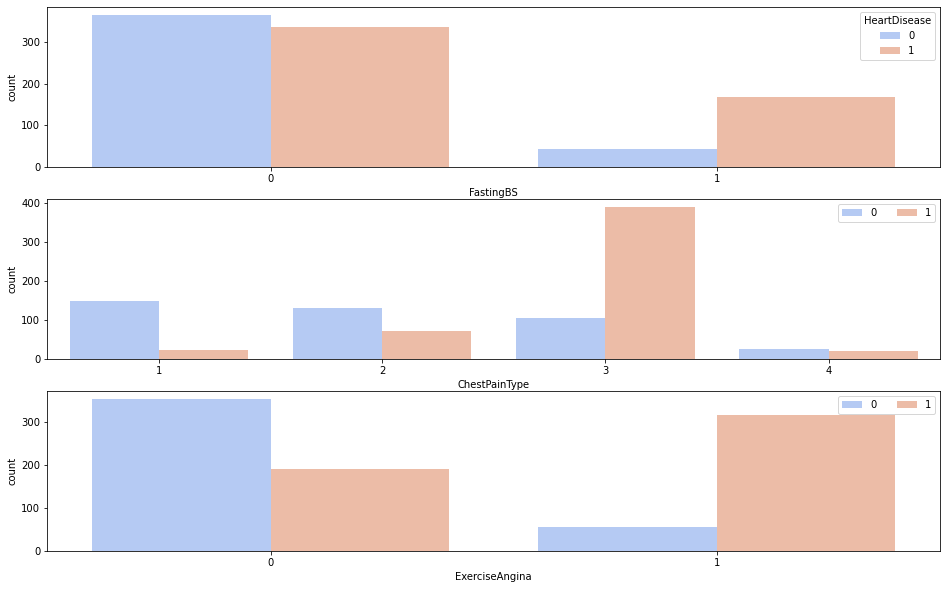

In [13]:
plt.figure(figsize = [16, 10])

# subplot 1: heart disease count by fastingbs
plt.subplot(3, 1, 1)
sns.countplot(x="FastingBS", data=df,hue='HeartDisease', palette = "coolwarm")

# subplot 2:  heart disease count by chest pain type
ax = plt.subplot(3, 1, 2)
sns.countplot(x="ChestPainType", data=df,hue='HeartDisease',  palette = "coolwarm")
ax.legend(ncol = 2)

# subplot 3: heart disease count by ExerciseAngina
ax = plt.subplot(3, 1, 3)
sns.countplot(x="ExerciseAngina", data=df,hue='HeartDisease',  palette = "coolwarm")
ax.legend(loc = 1, ncol = 2) 

plt.show()

## Data preprocessing  and model building

In [14]:
X= df.drop('HeartDisease', axis=1)
y = df.HeartDisease

In [15]:
# Split train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### pipeline, handling missing values, and feature scaling 

In [16]:
steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
    ("scaling",StandardScaler()),
      ("LR",LogisticRegression(solver='liblinear', max_iter=1000))]

In [17]:
pipe=Pipeline(steps)

## model training using logistic regression

In [18]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scaling', StandardScaler()),
                ('LR', LogisticRegression(max_iter=1000, solver='liblinear'))])

In [19]:
lr_pred=pipe.predict(X_test)

## model evaluation

In [20]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       130
           1       0.82      0.87      0.84       145

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



## model training and hyperparameter tuning

In [21]:
params ={}
params['SVC__C']= [0.1,1, 10, 100]
params['SVC__gamma']= [1,0.1,0.01,0.001]
params['SVC__kernel']= ['rbf']

In [22]:
step_2=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
    ("scaling",StandardScaler()),
      ("SVC",SVC())]

In [24]:
pipe_2=Pipeline(step_2)

In [25]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)

In [26]:
grid = GridSearchCV(pipe_2,params,refit=True,verbose=2,cv=skf)

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END .......SVC__C=0.1, SVC__gamma=0.01, SVC__kernel=rbf; total time=   0.0s
[CV] END .......SVC__C=0.1, SVC__gamma=0.01, SVC

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('imputation_mean', SimpleImputer()),
                                       ('scaling', StandardScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.1, 1, 10, 100],
                         'SVC__gamma': [1, 0.1, 0.01, 0.001],
                         'SVC__kernel': ['rbf']},
             verbose=2)

In [28]:
svm_pred=grid.predict(X_test)

## model evaluation

In [29]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.84       130
           1       0.83      0.92      0.87       145

    accuracy                           0.85       275
   macro avg       0.86      0.85      0.85       275
weighted avg       0.86      0.85      0.85       275

